In [1]:
import pandas as pd
master_table = pd.read_csv('/Users/suchirnaik/Downloads/KPMG/master_table_for_fuzzy.csv')

In [2]:
master_table.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,tenure,Age,postcode,job_title_transaction_count,postcode_transaction_count,age_transaction_count,tenure_transaction_count,recency,frequency,total_monetary_value
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,10.0,0.0,3064.0,5.833333,5.000000,5.730803,5.564972,75,3,1953.15
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,10.0,38.0,2196.0,6.448276,5.500000,5.722222,5.564972,20,7,7351.70
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,...,22.0,40.0,2835.0,5.580645,5.500000,5.849162,5.312500,56,6,8148.22
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,...,16.0,0.0,2096.0,5.640000,5.750000,5.730803,5.675532,121,7,7539.81
4,6,25,2339,2017-03-08,True,Approved,Giant Bicycles,Road,medium,medium,...,16.0,0.0,2153.0,7.333333,6.035714,5.730803,5.675532,11,9,10497.39


In [3]:
master_table.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,tenure,Age,postcode,job_title_transaction_count,postcode_transaction_count,age_transaction_count,tenure_transaction_count,recency,frequency,total_monetary_value
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,10.0,0.0,3064.0,5.833333,5.000000,5.730803,5.564972,75,3,1953.15
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,10.0,38.0,2196.0,6.448276,5.500000,5.722222,5.564972,20,7,7351.70
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,...,22.0,40.0,2835.0,5.580645,5.500000,5.849162,5.312500,56,6,8148.22
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,...,16.0,0.0,2096.0,5.640000,5.750000,5.730803,5.675532,121,7,7539.81
4,6,25,2339,2017-03-08,True,Approved,Giant Bicycles,Road,medium,medium,...,16.0,0.0,2153.0,7.333333,6.035714,5.730803,5.675532,11,9,10497.39


In [4]:
brands = master_table['brand'].unique()


In [5]:
brands

array(['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles',
       'Giant Bicycles', 'WeareA2B'], dtype=object)

In [6]:
master_table.dtypes

transaction_id                   int64
product_id                       int64
customer_id                      int64
transaction_date                object
online_order                      bool
order_status                    object
brand                           object
product_line                    object
product_class                   object
product_size                    object
list_price                     float64
standard_cost                  float64
product_first_sold_date         object
gender                          object
job_title                       object
wealth_segment                  object
deceased_indicator              object
owns_car                        object
tenure                         float64
Age                            float64
postcode                       float64
job_title_transaction_count    float64
postcode_transaction_count     float64
age_transaction_count          float64
tenure_transaction_count       float64
recency                  

In [7]:
### Converting the respective features to Binary
#### 1. online_order
#### 2. deceased_indiactor
#### 3. Owns_car

In [8]:
#First dropping the un-necssary columsn
columns_to_drop = ['standard_cost', 'product_first_sold_date']
master_table.drop(columns_to_drop, axis=1, inplace=True)

In [9]:
## Converting to boolean:

In [10]:
master_table['online_order'].unique()

array([False,  True])

In [11]:
master_table['deceased_indicator'].unique()

array(['N', 'Y'], dtype=object)

In [12]:
master_table['owns_car'].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
#False -0 , True -1
#N- 0, Y-1
#No - 0, Yes -1 

In [14]:
master_table['deceased_indicator'].value_counts()

N    17106
Y        8
Name: deceased_indicator, dtype: int64

In [15]:
master_table['online_order'] = master_table['online_order'].replace({True: 1, False: 0})

In [16]:
master_table['online_order'].unique()

array([0, 1])

In [17]:
master_table['owns_car'] = master_table['owns_car'].replace({'Yes': 1, 'No': 0})

In [18]:
master_table['owns_car'].unique()

array([1, 0])

In [19]:
master_table['deceased_indicator'] = master_table['deceased_indicator'].replace({'Y': 1, 'N': 0})

In [20]:
master_table['deceased_indicator'].unique()

array([0, 1])

In [21]:
master_table

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,tenure,Age,postcode,job_title_transaction_count,postcode_transaction_count,age_transaction_count,tenure_transaction_count,recency,frequency,total_monetary_value
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,...,10.0,0.0,3064.0,5.833333,5.000000,5.730803,5.564972,75,3,1953.15
1,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,...,10.0,38.0,2196.0,6.448276,5.500000,5.722222,5.564972,20,7,7351.70
2,3,37,402,2017-10-16,0,Approved,OHM Cycles,Standard,low,medium,...,22.0,40.0,2835.0,5.580645,5.500000,5.849162,5.312500,56,6,8148.22
3,4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,...,16.0,0.0,2096.0,5.640000,5.750000,5.730803,5.675532,121,7,7539.81
4,6,25,2339,2017-03-08,1,Approved,Giant Bicycles,Road,medium,medium,...,16.0,0.0,2153.0,7.333333,6.035714,5.730803,5.675532,11,9,10497.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17109,19995,9,718,2017-05-13,1,Approved,OHM Cycles,Road,medium,medium,...,7.0,39.0,4217.0,6.111111,6.000000,5.946524,5.862069,34,8,6777.43
17110,19996,51,1018,2017-06-24,1,Approved,OHM Cycles,Standard,high,medium,...,7.0,23.0,3109.0,6.576923,6.000000,5.538462,5.862069,26,5,6164.88
17111,19997,41,127,2017-11-09,1,Approved,Solex,Road,medium,medium,...,19.0,43.0,4405.0,5.608696,8.333333,5.610687,5.978571,23,10,9949.62
17112,19998,87,2284,2017-04-14,1,Approved,OHM Cycles,Standard,medium,medium,...,14.0,43.0,3630.0,6.250000,5.692308,5.610687,5.568306,34,7,7556.94


In [22]:
#Also dropping order status
master_table.drop('order_status', axis=1, inplace=True)

In [23]:
master_table.dtypes

transaction_id                   int64
product_id                       int64
customer_id                      int64
transaction_date                object
online_order                     int64
brand                           object
product_line                    object
product_class                   object
product_size                    object
list_price                     float64
gender                          object
job_title                       object
wealth_segment                  object
deceased_indicator               int64
owns_car                         int64
tenure                         float64
Age                            float64
postcode                       float64
job_title_transaction_count    float64
postcode_transaction_count     float64
age_transaction_count          float64
tenure_transaction_count       float64
recency                          int64
frequency                        int64
total_monetary_value           float64
dtype: object

In [24]:
master_table['gender'].value_counts()

Female    8505
Male      8209
U          400
Name: gender, dtype: int64

In [25]:
master_table_one_hot = pd.get_dummies(master_table, columns=['brand', 'product_line', 'product_class', 'product_size','gender','job_title','wealth_segment'])

In [26]:
master_table_one_hot

,transaction_id,product_id,customer_id,transaction_date,online_order,list_price,deceased_indicator,owns_car,tenure,Age,...,job_title_Web Designer II,job_title_Web Designer III,job_title_Web Designer IV,job_title_Web Developer I,job_title_Web Developer II,job_title_Web Developer III,job_title_Web Developer IV,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer
0,1,2,2950,2017-02-25,0,71.49,0,1,10.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,2,3,3120,2017-05-21,1,2091.47,0,1,10.0,38.0,...,0,0,0,0,0,0,0,0,0,1
2,3,37,402,2017-10-16,0,1793.43,0,0,22.0,40.0,...,0,0,0,0,0,0,0,1,0,0
3,4,88,3135,2017-08-31,0,1198.46,0,0,16.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,6,25,2339,2017-03-08,1,1538.99,0,1,16.0,0.0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17109,19995,9,718,2017-05-13,1,742.54,0,1,7.0,39.0,...,0,0,0,0,0,0,0,0,0,1
17110,19996,51,1018,2017-06-24,1,2005.66,0,1,7.0,23.0,...,0,0,0,0,0,0,0,0,0,1
17111,19997,41,127,2017-11-09,1,416.98,0,0,19.0,43.0,...,0,0,0,0,0,0,0,0,0,1
17112,19998,87,2284,2017-04-14,1,1636.90,0,0,14.0,43.0,...,0,0,0,0,0,0,0,0,1,0


In [27]:
master_table.dtypes

transaction_id                   int64
product_id                       int64
customer_id                      int64
transaction_date                object
online_order                     int64
brand                           object
product_line                    object
product_class                   object
product_size                    object
list_price                     float64
gender                          object
job_title                       object
wealth_segment                  object
deceased_indicator               int64
owns_car                         int64
tenure                         float64
Age                            float64
postcode                       float64
job_title_transaction_count    float64
postcode_transaction_count     float64
age_transaction_count          float64
tenure_transaction_count       float64
recency                          int64
frequency                        int64
total_monetary_value           float64
dtype: object

In [28]:
master_table['product_id'].unique()

array([  2,   3,  37,  88,  25,  22,  15,  67,  12,  61,  35,  16,  33,
        54,  27,  82,  89,  64,  19,  72,  91,   1,  99,   0,  92,  14,
        44,  76,  46,  55,  66,  81,  86,  32,  77,  96,   6,  47,  94,
        93,  60,  28,   4,  38,  58,  50,  80,  87,  84,  31,  62,  17,
        73,  45,  95,  18,  78,  70,  26,  36,  98,  75,  42,  24,  65,
        29,  10,   7,   9,  56,  69,  97, 100,  90,  20,  34,  74,  57,
        23,   5,  51,  63,  40,   8,  13,  30,  21,  48,  49,  53,  68,
        79,  71,  59,  83,  39,  43,  11,  52,  85,  41])

In [29]:
### Finding the optimal number of clusters 

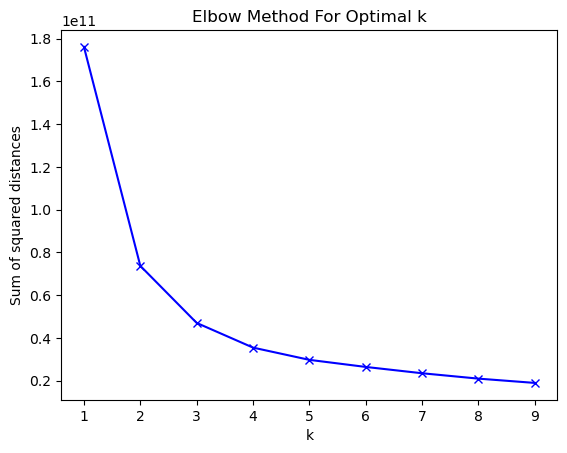

In [30]:
#Ploting the elbow curve to get the optimal clusters. At 3 the curve forms an elbow or starts becoming constant. So we choose 3 clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate data
X = master_table_one_hot.drop(['customer_id','transaction_date','transaction_id'], axis=1)

# Calculate sum of squared distances for different values of k
ssd = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg}")

For n_clusters = 2, the silhouette score is 0.475523604365343
For n_clusters = 3, the silhouette score is 0.4033039302234717
For n_clusters = 4, the silhouette score is 0.35039865766877915
For n_clusters = 5, the silhouette score is 0.3128470107934936


In [32]:
#Silouhetter score was less. Trying to increase score by dropping certain columns

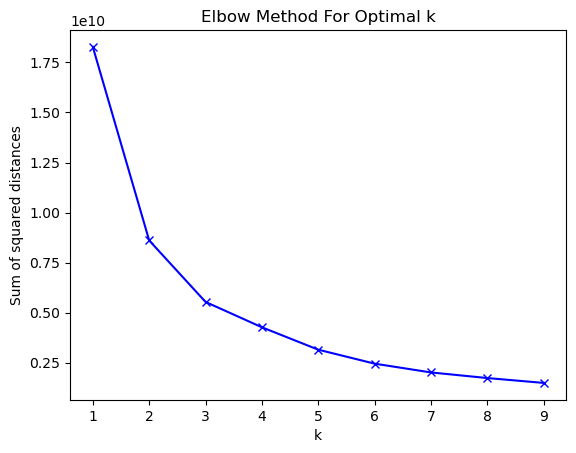

In [33]:
#Ploting the elbow curve to get the optimal clusters. At 3 the curve forms an elbow or starts becoming constant. So we choose 3 clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate data
X = master_table_one_hot.drop(['customer_id','transaction_date','transaction_id','job_title_transaction_count','postcode_transaction_count','age_transaction_count','tenure_transaction_count','recency','frequency','total_monetary_value'], axis=1)

# Calculate sum of squared distances for different values of k
ssd = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


##### Increase in silouhetter scores can be seen by dropping irrelavant columns which may not be useful for clustering

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg}")

For n_clusters = 2, the silhouette score is 0.4970877975158036
For n_clusters = 3, the silhouette score is 0.435037532984613
For n_clusters = 4, the silhouette score is 0.4208647110787514
For n_clusters = 5, the silhouette score is 0.4342146934322485


In [35]:
master_table['product_line'].unique()

array(['Standard', 'Road', 'Touring', 'Mountain'], dtype=object)

In [36]:
master_table['product_class'].unique()

array(['medium', 'low', 'high'], dtype=object)

In [37]:
master_table['product_size'].unique()

array(['medium', 'large', 'small'], dtype=object)

In [38]:
master_table_one_hot.dtypes

transaction_id                       int64
product_id                           int64
customer_id                          int64
transaction_date                    object
online_order                         int64
                                     ...  
job_title_Web Developer III          uint8
job_title_Web Developer IV           uint8
wealth_segment_Affluent Customer     uint8
wealth_segment_High Net Worth        uint8
wealth_segment_Mass Customer         uint8
Length: 235, dtype: object

In [39]:
downloads_folder = f'/Users/suchirnaik/Downloads/KPMG/'


file_name = 'master_table_one_hot.csv'


file_path = downloads_folder + file_name

master_table_one_hot.to_csv(file_path, index=False) 

In [40]:
master_table

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,...,tenure,Age,postcode,job_title_transaction_count,postcode_transaction_count,age_transaction_count,tenure_transaction_count,recency,frequency,total_monetary_value
0,1,2,2950,2017-02-25,0,Solex,Standard,medium,medium,71.49,...,10.0,0.0,3064.0,5.833333,5.000000,5.730803,5.564972,75,3,1953.15
1,2,3,3120,2017-05-21,1,Trek Bicycles,Standard,medium,large,2091.47,...,10.0,38.0,2196.0,6.448276,5.500000,5.722222,5.564972,20,7,7351.70
2,3,37,402,2017-10-16,0,OHM Cycles,Standard,low,medium,1793.43,...,22.0,40.0,2835.0,5.580645,5.500000,5.849162,5.312500,56,6,8148.22
3,4,88,3135,2017-08-31,0,Norco Bicycles,Standard,medium,medium,1198.46,...,16.0,0.0,2096.0,5.640000,5.750000,5.730803,5.675532,121,7,7539.81
4,6,25,2339,2017-03-08,1,Giant Bicycles,Road,medium,medium,1538.99,...,16.0,0.0,2153.0,7.333333,6.035714,5.730803,5.675532,11,9,10497.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17109,19995,9,718,2017-05-13,1,OHM Cycles,Road,medium,medium,742.54,...,7.0,39.0,4217.0,6.111111,6.000000,5.946524,5.862069,34,8,6777.43
17110,19996,51,1018,2017-06-24,1,OHM Cycles,Standard,high,medium,2005.66,...,7.0,23.0,3109.0,6.576923,6.000000,5.538462,5.862069,26,5,6164.88
17111,19997,41,127,2017-11-09,1,Solex,Road,medium,medium,416.98,...,19.0,43.0,4405.0,5.608696,8.333333,5.610687,5.978571,23,10,9949.62
17112,19998,87,2284,2017-04-14,1,OHM Cycles,Standard,medium,medium,1636.90,...,14.0,43.0,3630.0,6.250000,5.692308,5.610687,5.568306,34,7,7556.94


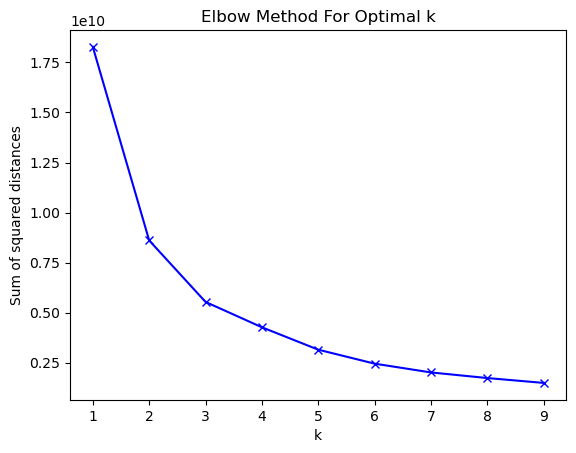

In [41]:
#Ploting the elbow curve to get the optimal clusters. At 3 the curve forms an elbow or starts becoming constant. So we choose 3 clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate data
X = master_table_one_hot.drop(['customer_id','transaction_date','transaction_id','job_title_transaction_count','postcode_transaction_count','age_transaction_count','tenure_transaction_count','recency','frequency','total_monetary_value','product_class_medium','product_class_low','product_class_high','product_size_medium','product_size_large','product_size_small','deceased_indicator',], axis=1)

# Calculate sum of squared distances for different values of k
ssd = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [42]:
X

,product_id,online_order,list_price,owns_car,tenure,Age,postcode,brand_Giant Bicycles,brand_Norco Bicycles,brand_OHM Cycles,...,job_title_Web Designer II,job_title_Web Designer III,job_title_Web Designer IV,job_title_Web Developer I,job_title_Web Developer II,job_title_Web Developer III,job_title_Web Developer IV,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer
0,2,0,71.49,1,10.0,0.0,3064.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3,1,2091.47,1,10.0,38.0,2196.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,37,0,1793.43,0,22.0,40.0,2835.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,88,0,1198.46,0,16.0,0.0,2096.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,25,1,1538.99,1,16.0,0.0,2153.0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17109,9,1,742.54,1,7.0,39.0,4217.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
17110,51,1,2005.66,1,7.0,23.0,3109.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
17111,41,1,416.98,0,19.0,43.0,4405.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17112,87,1,1636.90,0,14.0,43.0,3630.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg}")

For n_clusters = 2, the silhouette score is 0.49708852505341017
For n_clusters = 3, the silhouette score is 0.4350387515483092
For n_clusters = 4, the silhouette score is 0.42086655414025154
For n_clusters = 5, the silhouette score is 0.4342167526268649


In [44]:
### Filtering columns 

In [45]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder


In [46]:
variances = master_table_one_hot.var()

/var/folders/0w/78_w9pm16ts4trsks5rjpd440000gn/T/ipykernel_67619/1104478273.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variances = master_table_one_hot.var()


In [47]:
threshold = 0.1

# Apply variance thresholding
# Features with variance below the threshold will be removed
selector = VarianceThreshold(threshold=threshold)
df_selected = pd.DataFrame(selector.fit_transform(X), columns=X.columns[selector.get_support()])

In [48]:
df_selected

,product_id,online_order,list_price,owns_car,tenure,Age,postcode,brand_Giant Bicycles,brand_Norco Bicycles,brand_OHM Cycles,brand_Solex,brand_Trek Bicycles,brand_WeareA2B,product_line_Road,product_line_Standard,gender_Female,gender_Male,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer
0,2.0,0.0,71.49,1.0,10.0,0.0,3064.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,3.0,1.0,2091.47,1.0,10.0,38.0,2196.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,37.0,0.0,1793.43,0.0,22.0,40.0,2835.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,88.0,0.0,1198.46,0.0,16.0,0.0,2096.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,25.0,1.0,1538.99,1.0,16.0,0.0,2153.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17109,9.0,1.0,742.54,1.0,7.0,39.0,4217.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
17110,51.0,1.0,2005.66,1.0,7.0,23.0,3109.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
17111,41.0,1.0,416.98,0.0,19.0,43.0,4405.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
17112,87.0,1.0,1636.90,0.0,14.0,43.0,3630.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


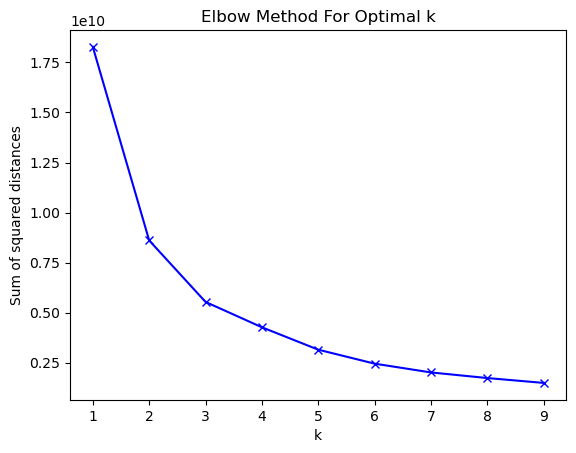

In [49]:
#Ploting the elbow curve to get the optimal clusters. At 3 the curve forms an elbow or starts becoming constant. So we choose 3 clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate data
#X = master_table_one_hot.drop(['customer_id','transaction_date','transaction_id','job_title_transaction_count','postcode_transaction_count','age_transaction_count','tenure_transaction_count','recency','frequency','total_monetary_value','product_class_medium','product_class_low','product_class_high','product_size_medium','product_size_large','product_size_small','deceased_indicator',], axis=1)

# Calculate sum of squared distances for different values of k
ssd = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_selected)
    ssd.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg}")

For n_clusters = 2, the silhouette score is 0.49708852505341017
For n_clusters = 3, the silhouette score is 0.4350387515483092
For n_clusters = 4, the silhouette score is 0.42086655414025154
For n_clusters = 5, the silhouette score is 0.4342167526268649


In [51]:
threshold = 0.2

# Apply variance thresholding
# Features with variance below the threshold will be removed
selector = VarianceThreshold(threshold=threshold)
df_selected_2 = pd.DataFrame(selector.fit_transform(X), columns=X.columns[selector.get_support()])

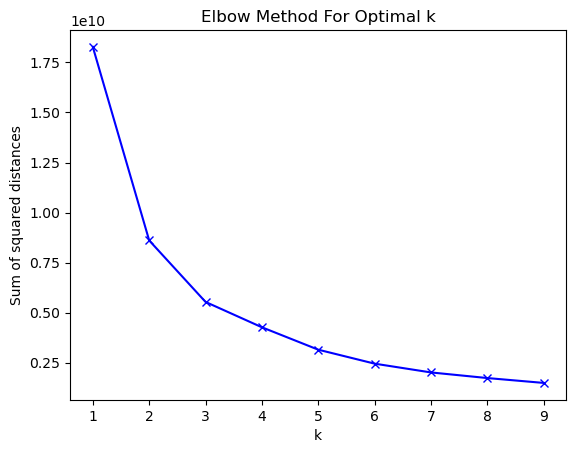

In [52]:
#Ploting the elbow curve to get the optimal clusters. At 3 the curve forms an elbow or starts becoming constant. So we choose 3 clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate data
#X = master_table_one_hot.drop(['customer_id','transaction_date','transaction_id','job_title_transaction_count','postcode_transaction_count','age_transaction_count','tenure_transaction_count','recency','frequency','total_monetary_value','product_class_medium','product_class_low','product_class_high','product_size_medium','product_size_large','product_size_small','deceased_indicator',], axis=1)

# Calculate sum of squared distances for different values of k
ssd = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_selected_2)
    ssd.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_selected_2)
    cluster_labels = kmeans.labels_
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg}")

For n_clusters = 2, the silhouette score is 0.49702157035110534
For n_clusters = 3, the silhouette score is 0.4350387515483092
For n_clusters = 4, the silhouette score is 0.42086655414025154
For n_clusters = 5, the silhouette score is 0.43425706456421237
For n_clusters = 6, the silhouette score is 0.43884729261825445
For n_clusters = 7, the silhouette score is 0.4425837836949274
For n_clusters = 8, the silhouette score is 0.45109259895391574


In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg}")

For n_clusters = 2, the silhouette score is 0.49708852505341017
For n_clusters = 3, the silhouette score is 0.4350387515483092
For n_clusters = 4, the silhouette score is 0.42086655414025154
For n_clusters = 5, the silhouette score is 0.4342167526268649
For n_clusters = 6, the silhouette score is 0.43884729261825445
For n_clusters = 7, the silhouette score is 0.4425837836949274
For n_clusters = 8, the silhouette score is 0.45109259895391574
For n_clusters = 9, the silhouette score is 0.4393903429938785
For n_clusters = 10, the silhouette score is 0.4435806499443591
For n_clusters = 11, the silhouette score is 0.4246666738701766
For n_clusters = 12, the silhouette score is 0.4307232579051154
For n_clusters = 13, the silhouette score is 0.42341238076818777
For n_clusters = 14, the silhouette score is 0.4297658859997054


In [55]:
# We can see that by increasing the variance threshold the clusters get better but increasing the cluster number increases the value of the score . So more the clusters the better . So we will now experiment with the originjal columns if by increasing cluatsers the score increases.We want to get a score close to 0.5

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg}")

For n_clusters = 2, the silhouette score is 0.49708852505341017
For n_clusters = 3, the silhouette score is 0.4350387515483092
For n_clusters = 4, the silhouette score is 0.42086655414025154
For n_clusters = 5, the silhouette score is 0.4342167526268649
For n_clusters = 6, the silhouette score is 0.43884729261825445
For n_clusters = 7, the silhouette score is 0.4425837836949274
For n_clusters = 8, the silhouette score is 0.45109259895391574
For n_clusters = 9, the silhouette score is 0.4393903429938785
For n_clusters = 10, the silhouette score is 0.4435806499443591
For n_clusters = 11, the silhouette score is 0.4246666738701766
For n_clusters = 12, the silhouette score is 0.4307232579051154
For n_clusters = 13, the silhouette score is 0.42341238076818777
For n_clusters = 14, the silhouette score is 0.4297658859997054
For n_clusters = 15, the silhouette score is 0.43010143046899124
For n_clusters = 16, the silhouette score is 0.42112488612558413
For n_clusters = 17, the silhouette score

In [57]:
#Aslo just checking once woth all the columns  of how the sillouhette score varies

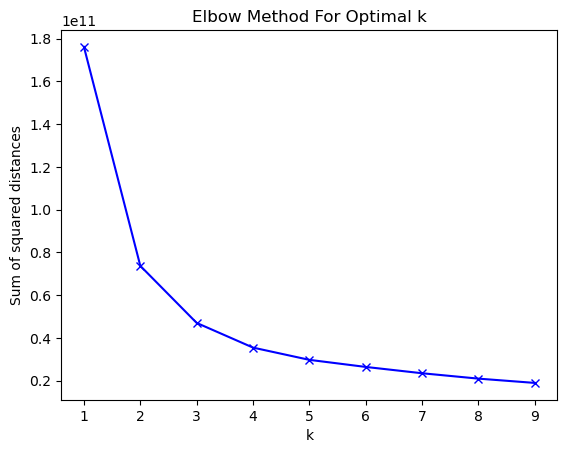

In [58]:
#Ploting the elbow curve to get the optimal clusters. At 3 the curve forms an elbow or starts becoming constant. So we choose 3 clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate data
X_2 = master_table_one_hot.drop(['customer_id','transaction_date','transaction_id'], axis=1)

# Calculate sum of squared distances for different values of k
ssd = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_2)
    ssd.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_2)
    cluster_labels = kmeans.labels_
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(X_2, cluster_labels)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg}")

For n_clusters = 2, the silhouette score is 0.475523604365343
For n_clusters = 3, the silhouette score is 0.4033039302234717
For n_clusters = 4, the silhouette score is 0.35039865766877915
For n_clusters = 5, the silhouette score is 0.3128470107934936
For n_clusters = 6, the silhouette score is 0.3165957385898179
For n_clusters = 7, the silhouette score is 0.2958012381625307
For n_clusters = 8, the silhouette score is 0.30973879592890685
For n_clusters = 9, the silhouette score is 0.2989363130541131
For n_clusters = 10, the silhouette score is 0.3030242330846285
For n_clusters = 11, the silhouette score is 0.29980216396971726
For n_clusters = 12, the silhouette score is 0.29338204913727584
For n_clusters = 13, the silhouette score is 0.2864619100510886
For n_clusters = 14, the silhouette score is 0.2840292657864037
For n_clusters = 15, the silhouette score is 0.2801101960550057
For n_clusters = 16, the silhouette score is 0.2723230136716856
For n_clusters = 17, the silhouette score is 

In [60]:
# We can see fro the above that thre is a considerable increase in the score when we select columns 
## We shall choose 8 clusters for this project which should be idle.
## Why are we choosing more clusters?
# 1.Increased Personalization: More clusters mean finer segmentation, which allows for highly personalized recommendations. Customers within each cluster likely have very similar preferences, enabling more precise recommendations.
# 2. Customer Satisfaction: Customers often appreciate recommendations that resonate with their specific preferences. By having more clusters and providing more targeted recommendations, you can enhance customer satisfaction and engagement.
# 3. Different clusters may have different preferences for various products or services. More clusters can help you capture a wider range of preferences and suggest a more diverse set of products.

In [61]:
master_table_one_hot.drop('cluster', axis=1, inplace=True)

KeyError: "['cluster'] not found in axis"

In [ ]:
##3 Visualising the plot using PCA

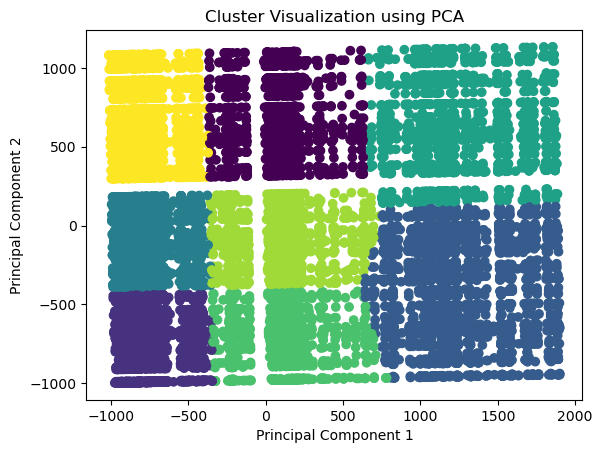

In [62]:
## It can be seen below thta all the clusters are pretty well seperated
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Clustering
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)
X['cluster'] = kmeans.predict(X)

# Assuming 'X' contains your data (features including one-hot encoded)
# Assuming 'labels' contains the cluster labels for each data point

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot in the reduced PCA space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Visualization using PCA')
plt.show()


In [63]:
X ###3 x shoukld have customer id also since we want to group customers who have bought similar producst

,product_id,online_order,list_price,owns_car,tenure,Age,postcode,brand_Giant Bicycles,brand_Norco Bicycles,brand_OHM Cycles,...,job_title_Web Designer III,job_title_Web Designer IV,job_title_Web Developer I,job_title_Web Developer II,job_title_Web Developer III,job_title_Web Developer IV,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,cluster
0,2,0,71.49,1,10.0,0.0,3064.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3,1,2091.47,1,10.0,38.0,2196.0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,37,0,1793.43,0,22.0,40.0,2835.0,0,0,1,...,0,0,0,0,0,0,1,0,0,5
3,88,0,1198.46,0,16.0,0.0,2096.0,0,1,0,...,0,0,0,0,0,0,0,0,1,3
4,25,1,1538.99,1,16.0,0.0,2153.0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17109,9,1,742.54,1,7.0,39.0,4217.0,0,0,1,...,0,0,0,0,0,0,0,0,1,4
17110,51,1,2005.66,1,7.0,23.0,3109.0,0,0,1,...,0,0,0,0,0,0,0,0,1,5
17111,41,1,416.98,0,19.0,43.0,4405.0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
17112,87,1,1636.90,0,14.0,43.0,3630.0,0,0,1,...,0,0,0,0,0,0,0,1,0,5


In [64]:
X

,product_id,online_order,list_price,owns_car,tenure,Age,postcode,brand_Giant Bicycles,brand_Norco Bicycles,brand_OHM Cycles,...,job_title_Web Designer III,job_title_Web Designer IV,job_title_Web Developer I,job_title_Web Developer II,job_title_Web Developer III,job_title_Web Developer IV,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,cluster
0,2,0,71.49,1,10.0,0.0,3064.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3,1,2091.47,1,10.0,38.0,2196.0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,37,0,1793.43,0,22.0,40.0,2835.0,0,0,1,...,0,0,0,0,0,0,1,0,0,5
3,88,0,1198.46,0,16.0,0.0,2096.0,0,1,0,...,0,0,0,0,0,0,0,0,1,3
4,25,1,1538.99,1,16.0,0.0,2153.0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17109,9,1,742.54,1,7.0,39.0,4217.0,0,0,1,...,0,0,0,0,0,0,0,0,1,4
17110,51,1,2005.66,1,7.0,23.0,3109.0,0,0,1,...,0,0,0,0,0,0,0,0,1,5
17111,41,1,416.98,0,19.0,43.0,4405.0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
17112,87,1,1636.90,0,14.0,43.0,3630.0,0,0,1,...,0,0,0,0,0,0,0,1,0,5


In [65]:
last_column_X = X.iloc[:, -1]

last_column_X

0        0
1        1
2        5
3        3
4        1
        ..
17109    4
17110    5
17111    4
17112    5
17113    1
Name: cluster, Length: 17114, dtype: int32

In [66]:
# Concatenate the last column of df1 to df2 as a new column
master_table_one_hot['cluster'] = last_column_X.values


In [67]:
### we would also need to have of multiple products are bring purchased

In [68]:
master_table_one_hot

,transaction_id,product_id,customer_id,transaction_date,online_order,list_price,deceased_indicator,owns_car,tenure,Age,...,job_title_Web Designer III,job_title_Web Designer IV,job_title_Web Developer I,job_title_Web Developer II,job_title_Web Developer III,job_title_Web Developer IV,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,cluster
0,1,2,2950,2017-02-25,0,71.49,0,1,10.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,2,3,3120,2017-05-21,1,2091.47,0,1,10.0,38.0,...,0,0,0,0,0,0,0,0,1,1
2,3,37,402,2017-10-16,0,1793.43,0,0,22.0,40.0,...,0,0,0,0,0,0,1,0,0,5
3,4,88,3135,2017-08-31,0,1198.46,0,0,16.0,0.0,...,0,0,0,0,0,0,0,0,1,3
4,6,25,2339,2017-03-08,1,1538.99,0,1,16.0,0.0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17109,19995,9,718,2017-05-13,1,742.54,0,1,7.0,39.0,...,0,0,0,0,0,0,0,0,1,4
17110,19996,51,1018,2017-06-24,1,2005.66,0,1,7.0,23.0,...,0,0,0,0,0,0,0,0,1,5
17111,19997,41,127,2017-11-09,1,416.98,0,0,19.0,43.0,...,0,0,0,0,0,0,0,0,1,4
17112,19998,87,2284,2017-04-14,1,1636.90,0,0,14.0,43.0,...,0,0,0,0,0,0,0,1,0,5


In [69]:
master_table_one_hot = master_table_one_hot.drop_duplicates()

In [70]:
master_table_one_hot

,transaction_id,product_id,customer_id,transaction_date,online_order,list_price,deceased_indicator,owns_car,tenure,Age,...,job_title_Web Designer III,job_title_Web Designer IV,job_title_Web Developer I,job_title_Web Developer II,job_title_Web Developer III,job_title_Web Developer IV,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,cluster
0,1,2,2950,2017-02-25,0,71.49,0,1,10.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,2,3,3120,2017-05-21,1,2091.47,0,1,10.0,38.0,...,0,0,0,0,0,0,0,0,1,1
2,3,37,402,2017-10-16,0,1793.43,0,0,22.0,40.0,...,0,0,0,0,0,0,1,0,0,5
3,4,88,3135,2017-08-31,0,1198.46,0,0,16.0,0.0,...,0,0,0,0,0,0,0,0,1,3
4,6,25,2339,2017-03-08,1,1538.99,0,1,16.0,0.0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17109,19995,9,718,2017-05-13,1,742.54,0,1,7.0,39.0,...,0,0,0,0,0,0,0,0,1,4
17110,19996,51,1018,2017-06-24,1,2005.66,0,1,7.0,23.0,...,0,0,0,0,0,0,0,0,1,5
17111,19997,41,127,2017-11-09,1,416.98,0,0,19.0,43.0,...,0,0,0,0,0,0,0,0,1,4
17112,19998,87,2284,2017-04-14,1,1636.90,0,0,14.0,43.0,...,0,0,0,0,0,0,0,1,0,5


##### Final master table with the clusters

In [71]:

master_table_one_hot[master_table_one_hot['customer_id']==1]

,transaction_id,product_id,customer_id,transaction_date,online_order,list_price,deceased_indicator,owns_car,tenure,Age,...,job_title_Web Designer III,job_title_Web Designer IV,job_title_Web Developer I,job_title_Web Developer II,job_title_Web Developer III,job_title_Web Developer IV,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,cluster
82,94,86,1,2017-12-23,0,235.63,0,1,11.0,0.0,...,0,0,0,0,0,0,0,0,1,7
3238,3765,38,1,2017-04-06,1,1577.53,0,1,11.0,0.0,...,0,0,0,0,0,0,0,0,1,1
4427,5157,47,1,2017-05-11,1,1720.70,0,1,11.0,0.0,...,0,0,0,0,0,0,0,0,1,1
8422,9785,72,1,2017-01-05,0,360.40,0,1,11.0,0.0,...,0,0,0,0,0,0,0,0,1,7
11510,13424,2,1,2017-02-21,0,71.49,0,1,11.0,0.0,...,0,0,0,0,0,0,0,0,1,7
11692,13644,25,1,2017-05-19,0,1538.99,0,1,11.0,0.0,...,0,0,0,0,0,0,0,0,1,1
12419,14486,23,1,2017-03-27,0,688.63,0,1,11.0,0.0,...,0,0,0,0,0,0,0,0,1,7
12792,14931,31,1,2017-12-14,1,230.91,0,1,11.0,0.0,...,0,0,0,0,0,0,0,0,1,7
13408,15663,32,1,2017-06-04,1,642.70,0,1,11.0,0.0,...,0,0,0,0,0,0,0,0,1,7
14064,16423,9,1,2017-12-09,1,742.54,0,1,11.0,0.0,...,0,0,0,0,0,0,0,0,1,7


## Creation of the mebership functions based on the EDA that we did 

In [72]:
### 1. Memebership recency 

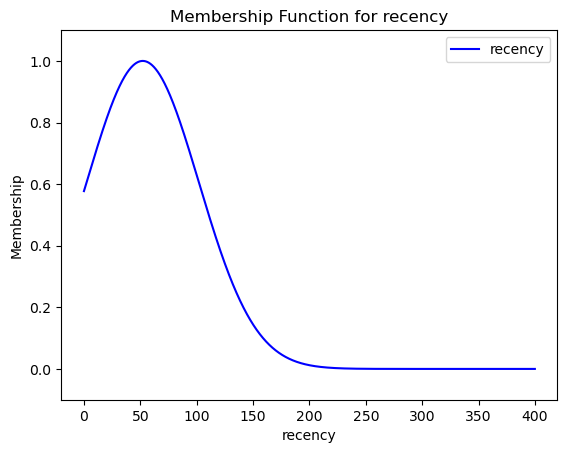

In [73]:
#While doing the eda we found that customers ususlally purchase with a recency of about 60 days . There fore we use a guassian bell curve for recommdations after 60 days
#The reasoning is that promortions are to be sent to the customer when they reach the 60 day average and maembership be adjusted based on that
# So the bell curve function also works in that way that it increases towards the mean and then decrease
# Writeabout the advantages of using this bell curve 
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

def membership_income(x):
    mean = master_table_one_hot['recency'].mean()
    std = master_table_one_hot['recency'].std()
    mfx = fuzz.gaussmf(x, mean, std)
    return mfx

x = np.arange(0, 400, 0.1)
mfx = membership_income(x)

plt.plot(x, mfx, 'b', linewidth=1.5, label='recency')
plt.title('Membership Function for recency')
plt.xlabel('recency')
plt.ylabel('Membership')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()

In [74]:
### 2. Membership Frequency

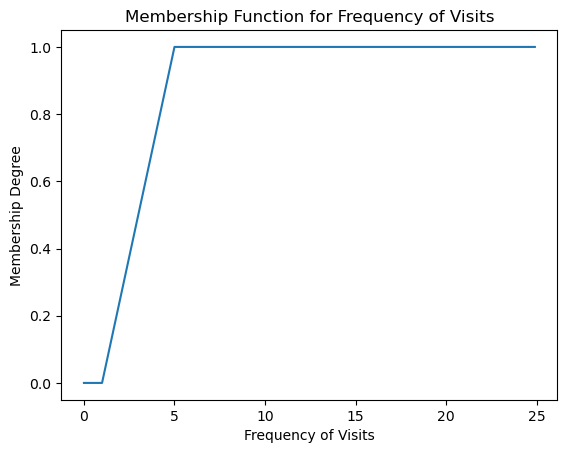

In [75]:
#Membership increases upto the 75th percentile and then becomes a constant one 
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit

def membership_frequency_of_visits(x):
    a = master_table_one_hot['frequency'].min()
    b = master_table_one_hot['frequency'].quantile(0.25)
    c = master_table_one_hot['frequency'].quantile(0.75)
    d = master_table_one_hot['frequency'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx

x = np.arange(0, 25, 0.1)
mfx = membership_frequency_of_visits(x)

plt.plot(x, mfx)
plt.title('Membership Function for Frequency of Visits')
plt.xlabel('Frequency of Visits')
plt.ylabel('Membership Degree')
plt.show()
#We want the frequency to increase and teh n become constant 
#since we would like to recommend products to high frquency customers

### 3. Monetray value

In [76]:
##### We will have to decide which fuzzy logic we would like to use based on the buisness logic
##### For now we will go ahead with the secoind memebership function since we would like to reommend more items to thos  who have purchased more
##### But again not all businesses would like to recommend items to only those who purchase more or have a high memebership score or have the best correlation between items based on traditional recommedations. This is when fuzzy logic can come into the picture to dteremine recommendations based on buisness insights or business values 

/Users/suchirnaik/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/membership/generatemf.py:149: RuntimeWarning: overflow encountered in power
  return 1. / (1. + np.abs((x - c) / a) ** (2 * b))


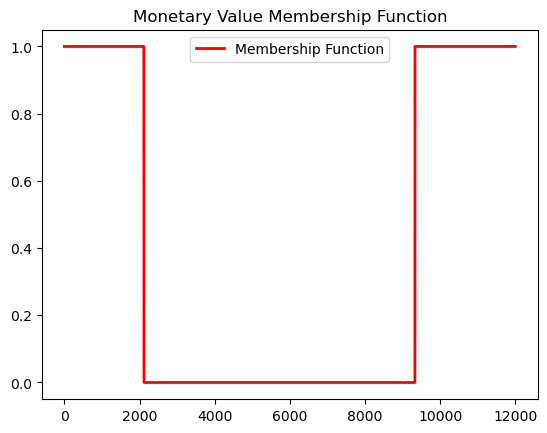

In [77]:
def membership_monetary_value(x):
    a = master_table_one_hot['total_monetary_value'].min()
    b = master_table_one_hot['total_monetary_value'].quantile(0.25)
    c = master_table_one_hot['total_monetary_value'].quantile(0.75)
    d = master_table_one_hot['total_monetary_value'].max()
    mean = (b+c)/2
    width = (c-b)/2
    mfx = fuzz.gbellmf(x, width, mean, a)
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx

x = np.arange(0, 12000, 1)
mfx = membership_monetary_value(x)

fig, ax = plt.subplots()
ax.plot(x, mfx, 'r', linewidth=2, label='Membership Function')
ax.set_title('Monetary Value Membership Function')
ax.legend()
plt.show()
#This bell-shaped membership function is useful for cases where we don't want to recommend products to 
#customers who have been purchasing a good average spend. However, in case the customer is purchasing low 
#monetary value we would like to recommend products to these customers. Also, in cases where customers have a 
#very high average spend, we would like to recommend premium products to these customers. This tactic could 
#be used when companies are trying to save on emails and are trying to send promotions to only customers who 
#are not purchasing, or those who are spending very high amounts. Again, seasonality can be used to see which 
#membership is best useful. When sales are going well recommendations can be sent to only customers who are not 
#purchasing. Therefore, fuzzy logic allows for a lot of flexibility and also seasonality can be taken into 
#consideration as to which membership has to be used.


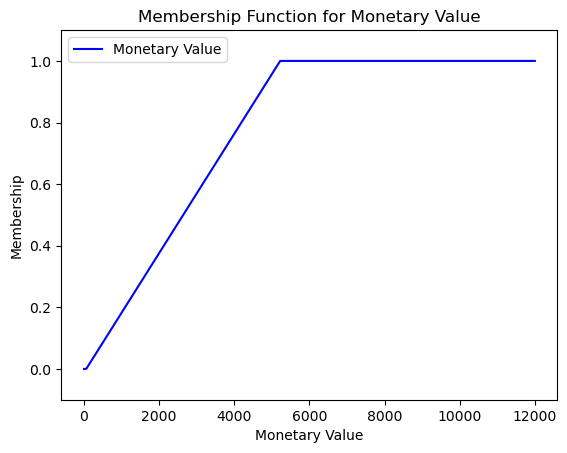

In [78]:
def membership_monetary_value(x):
    a = master_table_one_hot['total_monetary_value'].min()
    b = master_table_one_hot['total_monetary_value'].quantile(0.25)
    c = master_table_one_hot['total_monetary_value'].quantile(0.75)
    d = master_table_one_hot['total_monetary_value'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx


x = np.arange(0, 12000, 0.1)
mfx = membership_monetary_value(x)
plt.plot(x, mfx, 'b', linewidth=1.5, label='Monetary Value')
plt.title('Membership Function for Monetary Value')
plt.xlabel('Monetary Value')
plt.ylabel('Membership')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()



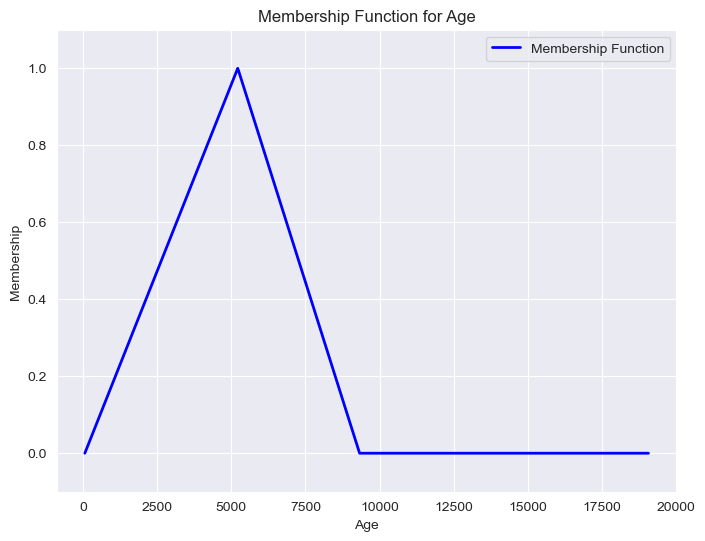

In [79]:
# So the below case can be used when we dont want to recommed to customers who have a very low monetary value spend or to customers who have a very high monetary value spend
# The reason could be that if we recommed to low purchasing customers then theu would not buy because they arent buying as frequently engh. Also busineess would decide not to recommend to customer who have a high monetary spend since they will anyway purcase.
#Business would like to recommd to customers who  have an avearge monetary spend since they would like to make these customers shift to the category who have a totalo moetary spend on the hoigher side.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the membership function
def monetary_traingular(x):
    a = master_table_one_hot['total_monetary_value'].min()
    b = master_table_one_hot['total_monetary_value'].quantile(0.25)
    c = master_table_one_hot['total_monetary_value'].quantile(0.75)
    return fuzz.trimf(x, [a, b, c])


# Generate x values for plotting
x = np.linspace(master_table_one_hot['total_monetary_value'].min(), master_table_one_hot['total_monetary_value'].max(), 1000)

# Calculate the membership function for x
mfx = monetary_traingular(x)

# Plot the membership function
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
plt.plot(x, mfx, 'b', linewidth=2, label='Membership Function')
plt.title('Membership Function for Age')
plt.xlabel('Age')
plt.ylabel('Membership')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()
#between 25 and 40 the membership is considerably high. We would like to recommend these age groups fruits
#Above 40 people get health complications and have sugar. Youngsters dont usually consume fruits(external research)
#27 to about 40 is the sweet spot to recommend fruits 

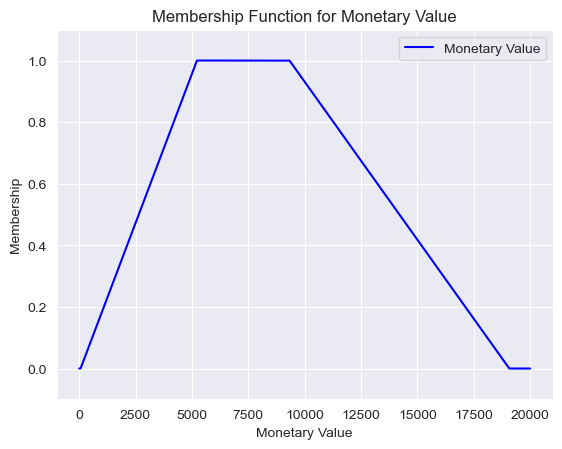

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import skfuzzy as fuzz
def membership_monetary_value(x):
    a = master_table_one_hot['total_monetary_value'].min()
    b = master_table_one_hot['total_monetary_value'].quantile(0.25)
    c = master_table_one_hot['total_monetary_value'].quantile(0.75)
    d = master_table_one_hot['total_monetary_value'].max()
    return fuzz.trapmf(x, [a, b, c, d]) 

x = np.arange(0, 20000, 0.1)
mfx = membership_monetary_value(x)
plt.plot(x, mfx, 'b', linewidth=1.5, label='Monetary Value')
plt.title('Membership Function for Monetary Value')
plt.xlabel('Monetary Value')
plt.ylabel('Membership')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()


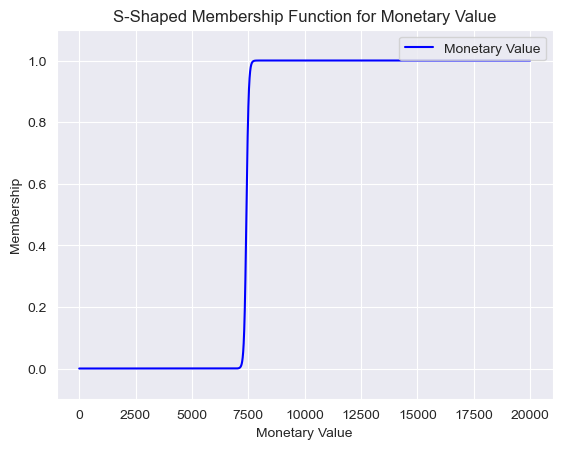

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

def membership_s_shaped_monetary_value(x):
    a = 0.02  # Shape parameter
    b = master_table_one_hot['total_monetary_value'].mean()  # Midpoint

    mfx = 1 / (1 + np.exp(-a * (x - b)))
    return mfx

x = np.arange(0, 20000, 0.1)
mfx = membership_s_shaped_monetary_value(x)

# Plotting
plt.plot(x, mfx, 'b', linewidth=1.5, label='Monetary Value')
plt.title('S-Shaped Membership Function for Monetary Value')
plt.xlabel('Monetary Value')
plt.ylabel('Membership')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()


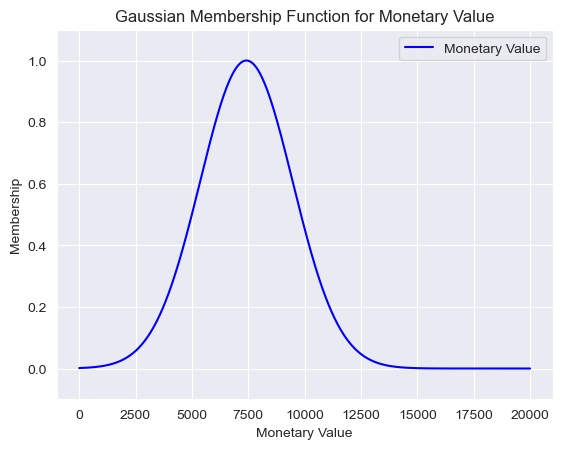

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

def membership_gaussian_monetary_value(x):
    mean = master_table_one_hot['total_monetary_value'].mean()
    sigma = (master_table_one_hot['total_monetary_value'].quantile(0.75) - 
             master_table_one_hot['total_monetary_value'].quantile(0.25)) / 2

    mfx = np.exp(-0.5 * ((x - mean) / sigma) ** 2)
    return mfx

x = np.arange(0, 20000, 0.1)
mfx = membership_gaussian_monetary_value(x)

# Plotting
plt.plot(x, mfx, 'b', linewidth=1.5, label='Monetary Value')
plt.title('Gaussian Membership Function for Monetary Value')
plt.xlabel('Monetary Value')
plt.ylabel('Membership')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()


### 4. Job Title

In [83]:
###  Next we were not able to find any specific trends in the below features. Therfore we created scores based on the average r=transaction counts. We will use these scores to create the memebrship functions. They are as belwo
### now memebrship functions can be used based on the business requirements. We shall play around with different membership functions

In [84]:
# 4. Job title
# So how we have planned to target our bikes is based on which job titles buy the most bycyles. So we are going to decide our fuzzy logic to recommend to those job titles who but the most cycles
# So this fuzzy logic along with the cluster logic will also recommend those cycles which similar user or job titles have bought while also giving a higher score to job titles which buy the most bycycles

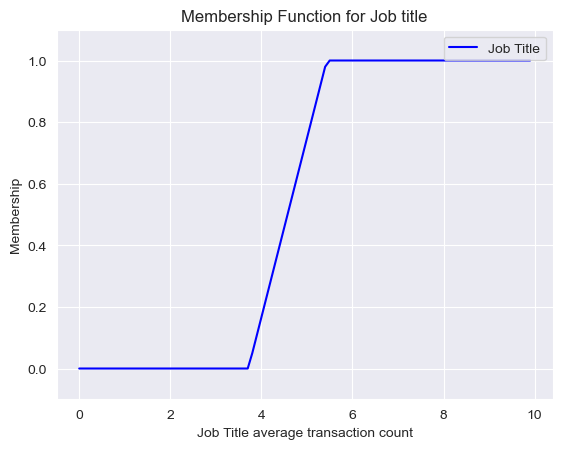

In [85]:
def membership_job_title(x):
    a = master_table_one_hot['job_title_transaction_count'].min()
    b = master_table_one_hot['job_title_transaction_count'].quantile(0.25)
    c = master_table_one_hot['job_title_transaction_count'].quantile(0.75)
    d = master_table_one_hot['job_title_transaction_count'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx


x = np.arange(0, 10, 0.1)
mfx = membership_job_title(x)
plt.plot(x, mfx, 'b', linewidth=1.5, label='Job Title')
plt.title('Membership Function for Job title')
plt.xlabel('Job Title average transaction count')
plt.ylabel('Membership')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()



### 5. Post Code

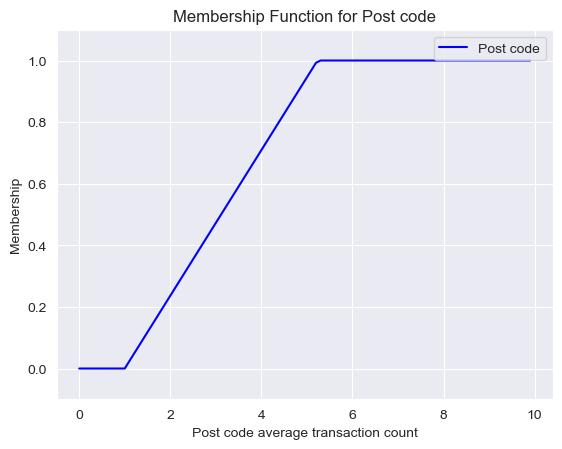

In [86]:
def membership_post_code(x):
    a = master_table_one_hot['postcode_transaction_count'].min()
    b = master_table_one_hot['postcode_transaction_count'].quantile(0.25)
    c = master_table_one_hot['postcode_transaction_count'].quantile(0.75)
    d = master_table_one_hot['postcode_transaction_count'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx


x = np.arange(0, 10, 0.1)
mfx = membership_post_code(x)
plt.plot(x, mfx, 'b', linewidth=1.5, label='Post code')
plt.title('Membership Function for Post code')
plt.xlabel('Post code average transaction count')
plt.ylabel('Membership')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()



### 6. Age

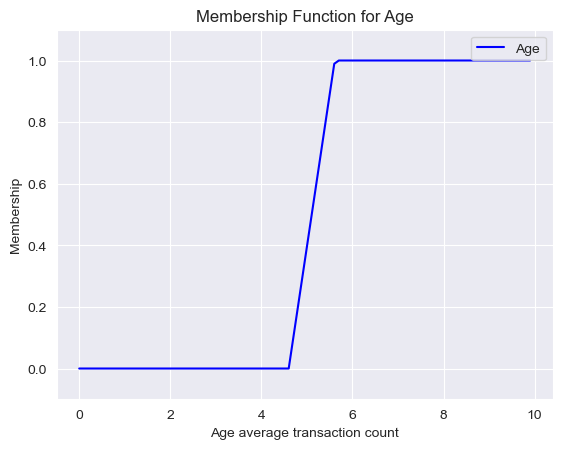

In [87]:
def membership_age(x):
    a = master_table_one_hot['age_transaction_count'].min()
    b = master_table_one_hot['age_transaction_count'].quantile(0.25)
    c = master_table_one_hot['age_transaction_count'].quantile(0.75)
    d = master_table_one_hot['age_transaction_count'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx


x = np.arange(0, 10, 0.1)
mfx = membership_age(x)
plt.plot(x, mfx, 'b', linewidth=1.5, label='Age')
plt.title('Membership Function for Age')
plt.xlabel('Age average transaction count')
plt.ylabel('Membership')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()



### 7. tenure_transaction_count

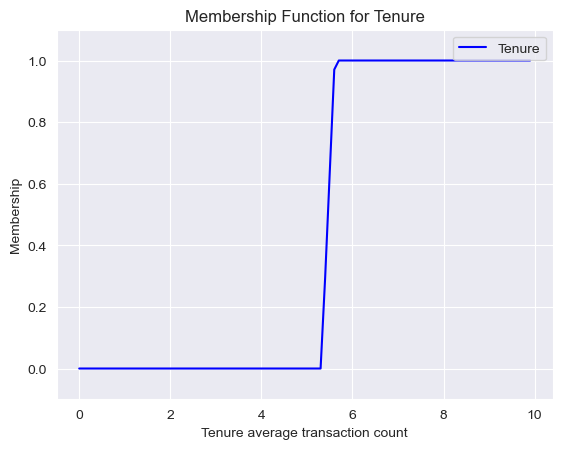

In [88]:
def membership_tenure(x):
    a = master_table_one_hot['tenure_transaction_count'].min()
    b = master_table_one_hot['tenure_transaction_count'].quantile(0.25)
    c = master_table_one_hot['tenure_transaction_count'].quantile(0.75)
    d = master_table_one_hot['tenure_transaction_count'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx


x = np.arange(0, 10, 0.1)
mfx = membership_tenure(x)
plt.plot(x, mfx, 'b', linewidth=1.5, label='Tenure')
plt.title('Membership Function for Tenure')
plt.xlabel('Tenure average transaction count')
plt.ylabel('Membership')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()



### All the necessary memebership functions finally defined below:

In [89]:
def membership_brand(x):
    brands = master_table_one_hot.filter(regex='^brand_').columns.tolist()
    memberships = []
    for brand in brands:
        if brand in x:
            memberships.append(1)
        else:
            memberships.append(0)
    return np.array(memberships)

def membership_recency(x):
    mean = master_table_one_hot['recency'].mean()
    std = master_table_one_hot['recency'].std()
    mfx = fuzz.gaussmf(x, mean, std)
    return mfx

def membership_frequency_of_visits(x):
    a = master_table_one_hot['frequency'].min()
    b = master_table_one_hot['frequency'].quantile(0.25)
    c = master_table_one_hot['frequency'].quantile(0.75)
    d = master_table_one_hot['frequency'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx

def membership_monetary_value(x):
    a = master_table_one_hot['total_monetary_value'].min()
    b = master_table_one_hot['total_monetary_value'].quantile(0.25)
    c = master_table_one_hot['total_monetary_value'].quantile(0.75)
    d = master_table_one_hot['total_monetary_value'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx

def membership_job_title(x):
    a = master_table_one_hot['job_title_transaction_count'].min()
    b = master_table_one_hot['job_title_transaction_count'].quantile(0.25)
    c = master_table_one_hot['job_title_transaction_count'].quantile(0.75)
    d = master_table_one_hot['job_title_transaction_count'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx

def membership_post_code(x):
    a = master_table_one_hot['postcode_transaction_count'].min()
    b = master_table_one_hot['postcode_transaction_count'].quantile(0.25)
    c = master_table_one_hot['postcode_transaction_count'].quantile(0.75)
    d = master_table_one_hot['postcode_transaction_count'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx

def membership_age(x):
    a = master_table_one_hot['age_transaction_count'].min()
    b = master_table_one_hot['age_transaction_count'].quantile(0.25)
    c = master_table_one_hot['age_transaction_count'].quantile(0.75)
    d = master_table_one_hot['age_transaction_count'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx

def membership_tenure(x):
    a = master_table_one_hot['tenure_transaction_count'].min()
    b = master_table_one_hot['tenure_transaction_count'].quantile(0.25)
    c = master_table_one_hot['tenure_transaction_count'].quantile(0.75)
    d = master_table_one_hot['tenure_transaction_count'].max()
    mfx = fuzz.trapmf(x, [a, b, c, d])
    mfx[x >= c] = 1  # Set membership to 1 for values above or equal to 75
    return mfx





In [90]:
#Price
#owns car
#walth segmant
#

In [91]:
master_table_one_hot.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,list_price,deceased_indicator,owns_car,tenure,Age,...,job_title_Web Designer III,job_title_Web Designer IV,job_title_Web Developer I,job_title_Web Developer II,job_title_Web Developer III,job_title_Web Developer IV,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,cluster
0,1,2,2950,2017-02-25,0,71.49,0,1,10.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,2,3,3120,2017-05-21,1,2091.47,0,1,10.0,38.0,...,0,0,0,0,0,0,0,0,1,1
2,3,37,402,2017-10-16,0,1793.43,0,0,22.0,40.0,...,0,0,0,0,0,0,1,0,0,5
3,4,88,3135,2017-08-31,0,1198.46,0,0,16.0,0.0,...,0,0,0,0,0,0,0,0,1,3
4,6,25,2339,2017-03-08,1,1538.99,0,1,16.0,0.0,...,0,0,0,0,0,0,1,0,0,1


In [92]:
brands = ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles','Giant Bicycles', 'WeareA2B']

### Building the collaboartive logic

In [93]:
def fuzzy_recommendation(customer_id):
    # Get purchase history for the customer
    customer_data = master_table_one_hot[master_table_one_hot['customer_id'] == customer_id]

    # Calculate degree of membership for each feature
#     membership_quantity_val = membership_quantity(customer_data['quantity'].values)
#     membership_price_val = membership_price(customer_data['price'].values)
#     membership_product_name_val = membership_product_name(customer_data.filter(regex='^product_name_').columns.tolist())
#     membership_brand_val = membership_brand(customer_data.filter(regex='^brand_').columns.tolist())
#     membership_age_val = membership_age(customer_data['age'].values)
#     membership_rating_val = membership_rating(customer_data['rating'].values)
#     membership_income_val = membership_income(customer_data['income'].values)
#     membership_frequency_of_visits_val = membership_frequency_of_visits(customer_data['frequency_of_visits'].values)
#     membership_recency_val = membership_recency(customer_data['recency'].values)
#     membership_monetary_value_val = membership_monetary_value(customer_data['monetary_value'].values)
    membership_brand_val = membership_brand(customer_data.filter(regex='^brand_').columns.tolist())
    membership_recency_val = membership_recency(customer_data['recency'].values)
    membership_frequency_of_visits_val = membership_frequency_of_visits(customer_data['frequency'].values) 
    membership_monetary_value_val = membership_monetary_value(customer_data['total_monetary_value'].values)
    membership_job_title_val = membership_job_title(customer_data['job_title_transaction_count'].values)
    membership_post_code_val = membership_post_code(customer_data['postcode_transaction_count'].values)
    membership_age_val = membership_age(customer_data['age_transaction_count'].values)
    membership_tenure_val = membership_tenure(customer_data['tenure_transaction_count'].values)
    
    print("Length of membership_job_title_val:", len(membership_job_title_val))
    print("Length of membership_post_code_val:", len(membership_post_code_val))
    print("Length of membership_age_val:", len(membership_age_val))
    print("Length of membership_tenure_val:", len(membership_tenure_val))
    print("Length of kmeans.cluster_centers_:", len(kmeans.cluster_centers_))
      
      

    # Calculate degree of membership for each cluster
    memberships = []
    for i in range(min(len(membership_job_title_val), len(membership_post_code_val), len(membership_age_val), len(membership_tenure_val))):
#     for i in range(len(kmeans.cluster_centers_)):
        membership = min(membership_job_title_val[i],membership_post_code_val[i],membership_age_val[i],membership_tenure_val[i],membership_frequency_of_visits_val[i],membership_recency_val[i],membership_monetary_value_val[i],np.max(membership_brand_val))
        memberships.append(membership)

    # Generate recommendations for products and brands
    #recommendations_product = {}
    recommendations_brand = {}
    for i, membership in enumerate(memberships):
#         for j in range(len(product_names)):
#             rule = f"product_{product_names[j]}"
#             support = kmeans.cluster_centers_[i][j + 10]
#             if rule not in recommendations_product:
#                 recommendations_product[rule] = 0
#             recommendations_product[rule] += support * membership

        for j in range(len(brands)):
            rule = f"brand_{brands[j]}"
#             support = kmeans.cluster_centers_[i][j + len(product_names)+ 10]
            support = kmeans.cluster_centers_[i][j + 18]
            if rule not in recommendations_brand:
                recommendations_brand[rule] = 0
            recommendations_brand[rule] += support * membership

#     recommendations_product = {k: v for k, v in sorted(recommendations_product.items(), key=lambda item: -item[1])}
    recommendations_brand = {k: v for k, v in sorted(recommendations_brand.items(), key=lambda item: -item[1])}

    # Get top 5 recommended products and brands
#     top_5_recommendations_product = []
    top_5_recommendations_brand = []
#     for rule in recommendations_product:
#         if len(top_5_recommendations_product) >= 5:
#             break
#         if rule.split('_')[0] == 'product':
#             top_5_recommendations_product.append(rule.split('_')[1])
    for rule in recommendations_brand:
        if len(top_5_recommendations_brand) >= 5:
            break
        if rule.split('_')[0] == 'brand':
            top_5_recommendations_brand.append(rule.split('_')[1])

    return top_5_recommendations_brand


In [94]:
def fuzzy_recommendation(customer_id):
    # Get purchase history for the customer
    customer_data = master_table_one_hot[master_table_one_hot['customer_id'] == customer_id]
    

    # Calculate degree of membership for each feature
#     membership_quantity_val = membership_quantity(customer_data['quantity'].values)
#     membership_price_val = membership_price(customer_data['price'].values)
#     membership_product_name_val = membership_product_name(customer_data.filter(regex='^product_name_').columns.tolist())
#     membership_brand_val = membership_brand(customer_data.filter(regex='^brand_').columns.tolist())
#     membership_age_val = membership_age(customer_data['age'].values)
#     membership_rating_val = membership_rating(customer_data['rating'].values)
#     membership_income_val = membership_income(customer_data['income'].values)
#     membership_frequency_of_visits_val = membership_frequency_of_visits(customer_data['frequency_of_visits'].values)
#     membership_recency_val = membership_recency(customer_data['recency'].values)
#     membership_monetary_value_val = membership_monetary_value(customer_data['monetary_value'].values)
    membership_brand_val = membership_brand(customer_data.filter(regex='^brand_').columns.tolist())
    membership_recency_val = membership_recency(customer_data['recency'].values)
    membership_frequency_of_visits_val = membership_frequency_of_visits(customer_data['frequency'].values) 
    membership_monetary_value_val = membership_monetary_value(customer_data['total_monetary_value'].values)
    membership_job_title_val = membership_job_title(customer_data['job_title_transaction_count'].values)
    membership_post_code_val = membership_post_code(customer_data['postcode_transaction_count'].values)
    membership_age_val = membership_age(customer_data['age_transaction_count'].values)
    membership_tenure_val = membership_tenure(customer_data['tenure_transaction_count'].values)
#     membership_quantity_val = membership_quantity(customer_data['quantity'].values)
    
#     print("Length of membership_job_title_val:", len(membership_job_title_val))
#     print("Length of membership_post_code_val:", len(membership_post_code_val))
#     print("Length of membership_age_val:", len(membership_age_val))
#     print("Length of membership_tenure_val:", len(membership_tenure_val))
#     print("Length of kmeans.cluster_centers_:", len(kmeans.cluster_centers_))
      
      

    # Calculate degree of membership for each cluster
    memberships = []
    for i in range(min(len(membership_job_title_val), len(membership_post_code_val), len(membership_age_val), len(membership_tenure_val))):
    #     for i in range(len(kmeans.cluster_centers_)):
            membership = membership_job_title_val[i]+membership_post_code_val[i]+membership_age_val[i]+membership_tenure_val[i]+membership_frequency_of_visits_val[i]+membership_recency_val[i]+membership_monetary_value_val[i]+np.max(membership_brand_val)
            memberships.append(membership)
  
    
    
        
#     customer_data = customer_data.reset_index()
    
    recommendations_brand = {}
    for i, membership in enumerate(memberships):
    #         for j in range(len(product_names)):
    #             rule = f"product_{product_names[j]}"
    #             support = kmeans.cluster_centers_[i][j + 10]
    #             if rule not in recommendations_product:
    #                 recommendations_product[rule] = 0
    #             recommendations_product[rule] += support * membership
        
        cluster_number  = customer_data['cluster'].iloc[i]

        for j in range(len(brands)):
            rule = f"brand_{brands[j]}"
    #         support = kmeans.cluster_centers_[i][j + len(product_names)+ 10]
            support = kmeans.cluster_centers_[cluster_number][j + 19]
            if rule not in recommendations_brand:
                recommendations_brand[rule] = 0
            recommendations_brand[rule] += support + membership

    #     recommendations_product = {k: v for k, v in sorted(recommendations_product.items(), key=lambda item: -item[1])}
    recommendations_brand = {k: v for k, v in sorted(recommendations_brand.items(), key=lambda item: -item[1])}


    

    # Get top 5 recommended products and brands
#     top_5_recommendations_product = []
    top_5_recommendations_brand = []
#     for rule in recommendations_product:
#         if len(top_5_recommendations_product) >= 5:
#             break
#         if rule.split('_')[0] == 'product':
#             top_5_recommendations_product.append(rule.split('_')[1])
    for rule in recommendations_brand:
        if len(top_5_recommendations_brand) >= 5:
            break
        if rule.split('_')[0] == 'brand':
            top_5_recommendations_brand.append(rule.split('_')[1])

    return top_5_recommendations_brand


In [95]:
# Loop through each customer and generate recommendations
for customer_id in master_table_one_hot['customer_id'].unique():
    recommendations_product_brand  = fuzzy_recommendation(customer_id)
#     print(f"Top 5 recommendations for customer {customer_id}: {recommendations_product}")
    print(f"Top 5 recommendations for customer {customer_id}: {recommendations_product_brand}")
    


Top 5 recommendations for customer 2950: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 3120: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 402: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 3135: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 2339: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1542: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 2459: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 1305: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 3262: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicy

Top 5 recommendations for customer 1390: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 2682: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 439: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 1579: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 2984: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 3470: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 1: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 757: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 1778: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bi

Top 5 recommendations for customer 1597: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 2713: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1435: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 1477: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1254: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 1423: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 591: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 1017: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 2123: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles',

Top 5 recommendations for customer 768: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 2147: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 529: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 624: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 2302: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 3380: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 314: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 1079: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1524: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycle

Top 5 recommendations for customer 892: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 832: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 3015: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 3484: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 2775: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 1208: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 2109: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 3195: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 3366: ['Solex', 'OHM Cycles', 'Trek Bicyc

Top 5 recommendations for customer 2747: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 2676: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 547: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 2623: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1509: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 661: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1854: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 1037: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1446: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 

Top 5 recommendations for customer 2118: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 1691: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 345: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1665: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 1059: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 964: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1466: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 3477: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 3023: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicyc

Top 5 recommendations for customer 1535: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 2153: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 2477: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 2243: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 1329: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 260: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 2587: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 2606: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 437: ['Solex', 'Trek Bicycles', 'OHM Cycles', 

Top 5 recommendations for customer 3028: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 3284: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 2158: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 357: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 1016: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 673: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 928: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 3421: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 2672: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', '

Top 5 recommendations for customer 2473: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 3044: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 367: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 2537: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 224: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1405: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 2309: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 1527: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 1181: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicyc

Top 5 recommendations for customer 1395: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 1184: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 2032: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 2349: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 135: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 2438: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 160: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 934: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 667: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycle

Top 5 recommendations for customer 1288: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 3146: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 2092: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 3211: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 3084: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 3454: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 2772: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 1114: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 970: ['Solex', 'OHM Cycles', 'Trek Bicycles',

Top 5 recommendations for customer 1830: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1428: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 2222: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 386: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 210: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 2679: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 1029: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 3095: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 1572: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicyc

Top 5 recommendations for customer 957: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 114: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1130: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1814: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 486: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 3474: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 1541: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 2603: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 2985: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant 

Top 5 recommendations for customer 1134: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 2375: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 240: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 124: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 1328: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 748: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 1213: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 182: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 1545: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycle

Top 5 recommendations for customer 3225: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 2714: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 322: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 1806: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 3327: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 3440: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 2273: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 2421: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 168: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicyc

Top 5 recommendations for customer 870: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 2010: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1689: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 1126: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 2116: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 1672: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 3026: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1177: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 3277: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Gian

Top 5 recommendations for customer 3428: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 116: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 214: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 440: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1735: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 1271: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 348: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 2329: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 722: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bi

Top 5 recommendations for customer 2170: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 2696: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 1886: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 650: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 551: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 3155: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 341: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 2708: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 2213: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', '

Top 5 recommendations for customer 1407: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 858: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 2753: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 374: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 2880: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 658: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 2991: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 2577: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1983: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', '

Top 5 recommendations for customer 3185: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 382: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 9: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 408: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 2399: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 3042: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 2110: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 1465: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 2665: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Gi

Top 5 recommendations for customer 489: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 1635: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 2068: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 1752: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 1776: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 2196: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 2707: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 1703: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 2648: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norc

Top 5 recommendations for customer 1413: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 1429: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 1637: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 3215: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 2442: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1336: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 3129: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 1367: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 2562: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bic

Top 5 recommendations for customer 2228: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 775: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 1660: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 122: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 3012: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 221: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 188: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 1148: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 562: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles

Top 5 recommendations for customer 380: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 2718: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 3266: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 2527: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 3432: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 1628: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 3200: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 608: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 1567: ['Solex', 'OHM Cycles', 'Trek Bicycles', 

Top 5 recommendations for customer 1056: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1093: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 3068: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 3144: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 300: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 896: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 1825: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 3174: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1746: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 

Top 5 recommendations for customer 1343: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 2085: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 2580: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 2831: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 575: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 3005: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1686: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1906: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 1043: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'Gian

Top 5 recommendations for customer 1584: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 2662: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 2125: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 3362: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 1727: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 3430: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1265: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 1718: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 886: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B',

Top 5 recommendations for customer 570: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 894: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1353: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 1418: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 2078: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 2533: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 807: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 2476: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 484: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant B

Top 5 recommendations for customer 1064: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1245: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 3363: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 460: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 2014: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1728: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 1534: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 3310: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 19: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant 

Top 5 recommendations for customer 2408: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 413: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1950: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 472: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1163: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 1416: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 1118: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 2460: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 2507: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 

Top 5 recommendations for customer 1704: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 2847: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 2218: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 1796: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 1855: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 780: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 2959: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 3443: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 2741: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicy

Top 5 recommendations for customer 2838: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 436: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1350: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 3183: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 899: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 96: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 1891: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 2931: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 1167: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycle

Top 5 recommendations for customer 2547: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 762: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 383: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 1961: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 2316: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 1973: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1602: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 2800: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 1204: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 

Top 5 recommendations for customer 1856: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 1981: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1871: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 1065: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 287: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 1427: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 53: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 1474: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 3427: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', '

Top 5 recommendations for customer 861: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 2686: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 45: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 2988: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 2962: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1532: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 3046: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 814: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 2013: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'G

Top 5 recommendations for customer 3445: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 1338: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 206: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 3300: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 265: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 3098: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 603: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 107: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 642: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bi

Top 5 recommendations for customer 2172: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1451: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1557: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 1156: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 317: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1384: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 3111: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 1383: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 2044: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Wear

Top 5 recommendations for customer 1958: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 922: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 1815: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 2811: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 95: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 527: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 301: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Norco Bicycles']
Top 5 recommendations for customer 208: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 1529: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Gia

Top 5 recommendations for customer 1975: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 373: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 2450: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 2960: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 600: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'WeareA2B', 'Giant Bicycles']
Top 5 recommendations for customer 1632: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 1209: ['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'WeareA2B']
Top 5 recommendations for customer 3272: ['Solex', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles', 'Giant Bicycles']
Top 5 recommendations for customer 1248: ['Solex', 'Trek Bicycles', 'OHM Cyc

In [96]:
column_name = 'brand_Giant Bicycles'
column_index = master_table_one_hot.columns.get_loc(column_name)

In [97]:
column_index 
#finiding the column index to start from that is the brands column


18

In [102]:
def fuzzy_recommendation(customer_id):
    # Get purchase history for the customer
    customer_data = master_table_one_hot[master_table_one_hot['customer_id'] == customer_id]

    # Calculate degree of membership for each feature
    membership_brand_val = membership_brand(customer_data.filter(regex='^brand_').columns.tolist())
    membership_recency_val = membership_recency(customer_data['recency'].values)
    membership_frequency_of_visits_val = membership_frequency_of_visits(customer_data['frequency'].values) 
    membership_monetary_value_val = membership_monetary_value(customer_data['total_monetary_value'].values)
    membership_job_title_val = membership_job_title(customer_data['job_title_transaction_count'].values)
    membership_post_code_val = membership_post_code(customer_data['postcode_transaction_count'].values)
    membership_age_val = membership_age(customer_data['age_transaction_count'].values)
    membership_tenure_val = membership_tenure(customer_data['tenure_transaction_count'].values)

    # Calculate degree of membership using Apriori support and add it to the membership score
 
    memberships = []
    for i in range(min(len(membership_job_title_val), len(membership_post_code_val), len(membership_age_val), len(membership_tenure_val))):
    #     for i in range(len(kmeans.cluster_centers_)):
            membership = membership_job_title_val[i]+membership_post_code_val[i]+membership_age_val[i]+membership_tenure_val[i]+membership_frequency_of_visits_val[i]+membership_recency_val[i]+membership_monetary_value_val[i]+np.max(membership_brand_val)
            memberships.append(membership)
  

    recommendations_brand = {}
    for i, membership in enumerate(memberships):
        cluster_number = customer_data['cluster'].iloc[i]
#         for j in range(len(brands):
#             rule = f"brand_{brands[j]}"
#             # Calculate Apriori support for the brand (you need to implement this)
#             apriori_support = calculate_apriori_support(rule, customer_id)
#             if rule not in recommendations_brand:
#                 recommendations_brand[rule] = 0
#             recommendations_brand[rule] += (apriori_support + membership)
                       
    
        for j in range(len(brands)):
            rule = f"brand_{brands[j]}"
    #         support = kmeans.cluster_centers_[i][j + len(product_names)+ 10]
            apriori_support = calculate_apriori_support(rule, customer_id)
            if rule not in recommendations_brand:
                recommendations_brand[rule] = 0
            recommendations_brand[rule] += support + membership

    #     recommendations_product = {k: v for k, v in sorted(recommendations_product.items(), key=lambda item: -item[1])}
    recommendations_brand = {k: v for k, v in sorted(recommendations_brand.items(), key=lambda item: -item[1])}



    recommendations_brand = {k: v for k, v in sorted(recommendations_brand.items(), key=lambda item: -item[1])}

    top_5_recommendations_brand = []
    for rule in recommendations_brand:
        if len(top_5_recommendations_brand) >= 5:
            break
        if rule.split('_')[0] == 'brand':
            top_5_recommendations_brand.append(rule.split('_')[1])

    return top_5_recommendations_brand


In [103]:
# Loop through each customer and generate recommendations
for customer_id in master_table_one_hot['customer_id'].unique():
    recommendations_product_brand  = fuzzy_recommendation(customer_id)
#     print(f"Top 5 recommendations for customer {customer_id}: {recommendations_product}")
    print(f"Top 5 recommendations for customer {customer_id}: {recommendations_product_brand}")
    


NameError: name 'calculate_apriori_support' is not defined

In [98]:
customer_data

NameError: name 'customer_data' is not defined

In [105]:
customer_data = master_table_one_hot[master_table_one_hot['customer_id'] == 1]

In [107]:
downloads_folder = f'/Users/suchirnaik/Downloads/'


file_name = 'customer_data_1.csv'


file_path = downloads_folder + file_name

customer_data.to_csv(file_path, index=False) 

In [106]:
customer_data

,transaction_id,product_id,customer_id,transaction_date,online_order,list_price,deceased_indicator,owns_car,tenure,Age,...,job_title_Web Designer III,job_title_Web Designer IV,job_title_Web Developer I,job_title_Web Developer II,job_title_Web Developer III,job_title_Web Developer IV,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,cluster
82,94,86,1,2017-12-23,0,235.63,0,1,11.0,0.0,...,0,0,0,0,0,0,0,0,1,7
3238,3765,38,1,2017-04-06,1,1577.53,0,1,11.0,0.0,...,0,0,0,0,0,0,0,0,1,1
4427,5157,47,1,2017-05-11,1,1720.70,0,1,11.0,0.0,...,0,0,0,0,0,0,0,0,1,1
8422,9785,72,1,2017-01-05,0,360.40,0,1,11.0,0.0,...,0,0,0,0,0,0,0,0,1,7
11510,13424,2,1,2017-02-21,0,71.49,0,1,11.0,0.0,...,0,0,0,0,0,0,0,0,1,7
11692,13644,25,1,2017-05-19,0,1538.99,0,1,11.0,0.0,...,0,0,0,0,0,0,0,0,1,1
12419,14486,23,1,2017-03-27,0,688.63,0,1,11.0,0.0,...,0,0,0,0,0,0,0,0,1,7
12792,14931,31,1,2017-12-14,1,230.91,0,1,11.0,0.0,...,0,0,0,0,0,0,0,0,1,7
13408,15663,32,1,2017-06-04,1,642.70,0,1,11.0,0.0,...,0,0,0,0,0,0,0,0,1,7
14064,16423,9,1,2017-12-09,1,742.54,0,1,11.0,0.0,...,0,0,0,0,0,0,0,0,1,7


In [ ]:
customer_data = master_table_one_hot[master_table_one_hot['customer_id'] == 15]
customer_data = customer_data.reset_index()


    # Calculate degree of membership for each feature
#     membership_quantity_val = membership_quantity(customer_data['quantity'].values)
#     membership_price_val = membership_price(customer_data['price'].values)
#     membership_product_name_val = membership_product_name(customer_data.filter(regex='^product_name_').columns.tolist())
#     membership_brand_val = membership_brand(customer_data.filter(regex='^brand_').columns.tolist())
#     membership_age_val = membership_age(customer_data['age'].values)
#     membership_rating_val = membership_rating(customer_data['rating'].values)
#     membership_income_val = membership_income(customer_data['income'].values)
#     membership_frequency_of_visits_val = membership_frequency_of_visits(customer_data['frequency_of_visits'].values)
#     membership_recency_val = membership_recency(customer_data['recency'].values)
#     membership_monetary_value_val = membership_monetary_value(customer_data['monetary_value'].values)
membership_brand_val = membership_brand(customer_data.filter(regex='^brand_').columns.tolist())
membership_recency_val = membership_recency(customer_data['recency'].values)
membership_frequency_of_visits_val = membership_frequency_of_visits(customer_data['frequency'].values) 
membership_monetary_value_val = membership_monetary_value(customer_data['total_monetary_value'].values)
membership_job_title_val = membership_job_title(customer_data['job_title_transaction_count'].values)
membership_post_code_val = membership_post_code(customer_data['postcode_transaction_count'].values)
membership_age_val = membership_age(customer_data['age_transaction_count'].values)
membership_tenure_val = membership_tenure(customer_data['tenure_transaction_count'].values)
    
print("Length of membership_job_title_val:", len(membership_job_title_val))
print("Length of membership_post_code_val:", len(membership_post_code_val))
print("Length of membership_age_val:", len(membership_age_val))
print("Length of membership_tenure_val:", len(membership_tenure_val))
print("Length of kmeans.cluster_centers_:", len(kmeans.cluster_centers_))


membership_brand_val 




In [104]:
customer_data

NameError: name 'customer_data' is not defined

In [ ]:
customer_data = customer_data.reset_index()

In [ ]:
cluster_number  = customer_data['cluster'][1]


In [ ]:
cluster_number

In [ ]:
membership_job_title_val

In [ ]:
#memebership or total brands should be less than the numebr of clusters.so quantity needs to be aggregared

In [ ]:
membership_post_code_val

In [ ]:
membership_age_val

In [ ]:
membership_tenure_val

In [ ]:
membership_recency_val

In [ ]:
memberships = []
for i in range(min(len(membership_job_title_val), len(membership_post_code_val), len(membership_age_val), len(membership_tenure_val))):
    membership = min(membership_job_title_val[i], membership_post_code_val[i], membership_age_val[i], membership_tenure_val[i], membership_frequency_of_visits_val[i], membership_recency_val[i], membership_monetary_value_val[i], np.max(membership_brand_val))
    memberships.append(membership)

In [ ]:
memberships

In [ ]:
len(membership_job_title_val)

In [ ]:
len(membership_post_code_val)

In [ ]:
len(membership_age_val)

In [ ]:
len(membership_tenure_val)

In [ ]:
recommendations_brand = {}
for i, membership in enumerate(memberships):
#         for j in range(len(product_names)):
#             rule = f"product_{product_names[j]}"
#             support = kmeans.cluster_centers_[i][j + 10]
#             if rule not in recommendations_product:
#                 recommendations_product[rule] = 0
#             recommendations_product[rule] += support * membership
cluster_number  = customer_data['cluster']['i']

    for j in range(len(brands)):
        rule = f"brand_{brands[j]}"
#         support = kmeans.cluster_centers_[i][j + len(product_names)+ 10]
        support = kmeans.cluster_centers_[cluster_number][j + 18]
        if rule not in recommendations_brand:
            recommendations_brand[rule] = 0
        recommendations_brand[rule] += support * membership

#     recommendations_product = {k: v for k, v in sorted(recommendations_product.items(), key=lambda item: -item[1])}
recommendations_brand = {k: v for k, v in sorted(recommendations_brand.items(), key=lambda item: -item[1])}


In [ ]:
kmeans.cluster_centers_

In [ ]:
len(brands)

In [ ]:
customer_data

In [ ]:
rows_to_display = slice(0, 8)  # Rows 0 to 7
columns_to_display = slice(19, 25)  # Columns 19 to 24 (exclusive)

# Select the relevant rows and columns from cluster_centers_
selected_cluster_centers = kmeans.cluster_centers_[rows_to_display, columns_to_display]

# Print the selected cluster centers
print("Selected Cluster Centers (Rows 0 to 7, Columns 19 to 24):")
print(selected_cluster_centers)

In [ ]:
selected_columns = customer_data.iloc[:, [ 18,19, 20, 21, 22,23,24, -1]]
selected_columns

In [ ]:
kmeans.cluster_centers_[2][20]

In [ ]:
kmeans.cluster_centers_[1][19]

In [ ]:
kmeans.cluster_centers_[3][19]

In [ ]:
kmeans.cluster_centers_[4][19]

In [ ]:
kmeans.cluster_centers_[5][19]

In [ ]:
kmeans.cluster_centers_[6][19]

In [ ]:
kmeans.cluster_centers_[7][19]

In [ ]:
kmeans.cluster_centers_[1][20]

In [ ]:
kmeans.cluster_centers_[2][20]

In [ ]:
kmeans.cluster_centers_[3][20]

In [ ]:
kmeans.cluster_centers_[4][20]

In [ ]:
kmeans.cluster_centers_[5][20]

In [ ]:
kmeans.cluster_centers_[5][20]

In [ ]:
kmeans.cluster_centers_[7][20]

In [ ]:
kmeans.cluster_centers_[2][21]

In [ ]:
kmeans.cluster_centers_[2][22]

In [ ]:
kmeans.cluster_centers_[2][23]

In [ ]:
kmeans.cluster_centers_[2][24]

In [ ]:
kmeans.cluster_centers_[4][19]

In [ ]:
kmeans.cluster_centers_[4][20]

In [ ]:
kmeans.cluster_centers_[4][21]

In [ ]:
kmeans.cluster_centers_[4][22]

In [ ]:
kmeans.cluster_centers_[4][23]

In [ ]:
kmeans.cluster_centers_[4][24]

In [ ]:
kmeans.cluster_centers_[7][19]

In [ ]:
kmeans.cluster_centers_[3][19]

In [ ]:
max_valid_index = len(kmeans.cluster_centers_) - 1

In [ ]:
max_valid_j = len(kmeans.cluster_centers_[0]) - 1

In [ ]:
max_valid_index

In [ ]:
max_valid_j

In [ ]:
support

In [ ]:
i

In [ ]:
j

In [ ]:
recommendations_brand

In [ ]:
range(min(len(membership_job_title_val), len(membership_post_code_val), len(membership_age_val), len(membership_tenure_val)))     
 

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Create a DataFrame with 10 rows and 3 columns
data = {
    'Feature1': [1, 2, 5, 6, 9, 12, 15, 18, 20, 22],
    'Feature2': [3, 4, 7, 8, 10, 13, 16, 19, 21, 23],
    'Feature3': [0, 1, 4, 7, 9, 11, 14, 17, 20, 24]
}
df = pd.DataFrame(data)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=8)
kmeans.fit(df)


In [ ]:
# Print the cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)


In [ ]:
kmeans.cluster_centers_[0][0]

In [ ]:
kmeans.cluster_centers_[0][1]

In [ ]:
kmeans.cluster_centers_[8][2]